In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Estilo y paleta 

sns.set_theme(style="whitegrid")
PALETTE = sns.color_palette("colorblind")
plt.rcParams.update({
    "figure.figsize": (9, 5.2),
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

In [4]:
df = pd.read_csv("C:/Users/luigu/OneDrive/Escritorio/Titanic ML Project/data/Titanic-Dataset.csv")
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 ANÁLISIS DE ESTRUCTURA Y CALIDAD

In [5]:
# Información general del dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Valores faltantes por columna

missing_counts = df.isnull().sum()
total_rows = len(df)
missing_percent = (missing_counts / total_rows) * 100

missing_df = (
    pd.DataFrame({
        "faltantes": missing_counts,
        "porcentaje": missing_percent
    })
    .sort_values(by="porcentaje", ascending=False)
)

print("Valores faltantes por columna:\n")
print(missing_df)

Valores faltantes por columna:

             faltantes  porcentaje
Cabin              687   77.104377
Age                177   19.865320
Embarked             2    0.224467
PassengerId          0    0.000000
Name                 0    0.000000
Pclass               0    0.000000
Survived             0    0.000000
Sex                  0    0.000000
Parch                0    0.000000
SibSp                0    0.000000
Fare                 0    0.000000
Ticket               0    0.000000


In [7]:
# Buscar duplicados

num_duplicados = df.duplicated().sum()
print("Duplicados:", num_duplicados)

Duplicados: 0


In [8]:
# Detectar outliers

def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers.shape[0]

print("Posibles outliers por variable numérica:\n")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col}: {detectar_outliers(col)}")

Posibles outliers por variable numérica:

PassengerId: 0
Survived: 0
Pclass: 0
Age: 11
SibSp: 46
Parch: 213
Fare: 116


## 1.2 Estadística Descriptiva

In [9]:
# Medidas de tendencia central y dispersión

print("Estadísticas descriptivas de variables numéricas")
display(df.describe().T)

Estadísticas descriptivas de variables numéricas


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
# Tablas de frecuencia para variables categóricas

df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False).str.strip()

for col in df.select_dtypes(include=['object']).columns:
    if col != "Name":
        display(df[col].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [11]:
# Análisis de la variable objetivo (Supervivencia)

print("Tasa de supervivencia general\n")
print(df['Survived'].value_counts(normalize=True))

Tasa de supervivencia general

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [12]:
# Estadísticas agrupadas por clase, género y edad

df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,30,50,80], labels=["Niños","Adolescentes","Jóvenes","Adultos","Mayores"])

print("Supervivencia por clase")
display(df.groupby("Pclass")["Survived"].mean())

print("Supervivencia por género")
display(df.groupby("Sex")["Survived"].mean())

print("Supervivencia por rangos de edad")
display(df.groupby("AgeGroup")["Survived"].mean())

Supervivencia por clase


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Supervivencia por género


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Supervivencia por rangos de edad


C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\305035867.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby("AgeGroup")["Survived"].mean())


AgeGroup
Niños           0.579710
Adolescentes    0.428571
Jóvenes         0.355556
Adultos         0.423237
Mayores         0.343750
Name: Survived, dtype: float64

## 1.3 Visualización Univariada

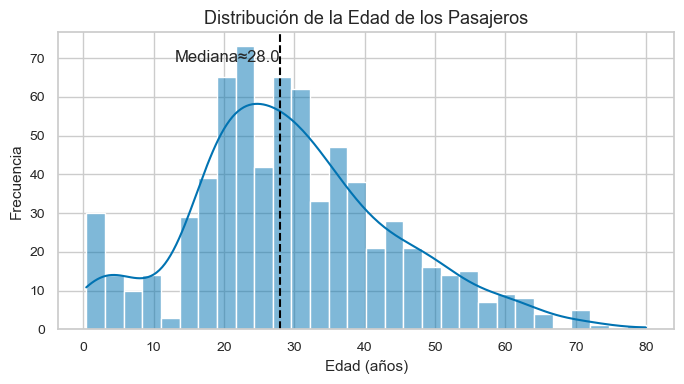

In [13]:
# Edad

plt.figure(figsize=(7,4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color=PALETTE[0], edgecolor="white")
plt.title("Distribución de la Edad de los Pasajeros")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
mediana = df['Age'].median()
plt.axvline(mediana, ls="--", color="black")
plt.text(mediana, plt.ylim()[1]*0.9, f"Mediana≈{mediana:.1f}", ha="right")
plt.tight_layout()

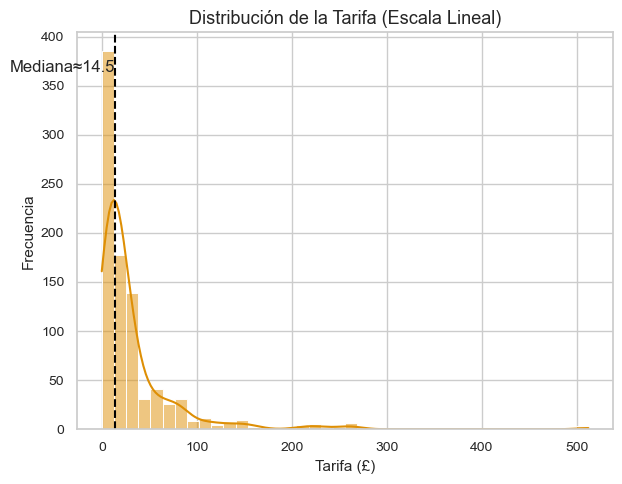

In [14]:
# Tarifa

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Fare'].dropna(), bins=40, kde=True, color=PALETTE[1], edgecolor="white")
plt.title("Distribución de la Tarifa (Escala Lineal)")
plt.xlabel("Tarifa (£)")
plt.ylabel("Frecuencia")
mediana = df['Fare'].median()
plt.axvline(mediana, ls="--", color="black")
plt.text(mediana, plt.ylim()[1]*0.9, f"Mediana≈{mediana:.1f}", ha="right")
plt.tight_layout()


C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3504909420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Sex", palette=PALETTE)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3504909420.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(data=df, x="Sex", palette=PALETTE)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3504909420.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Pclass", palette=PALETTE)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3504909420.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  a

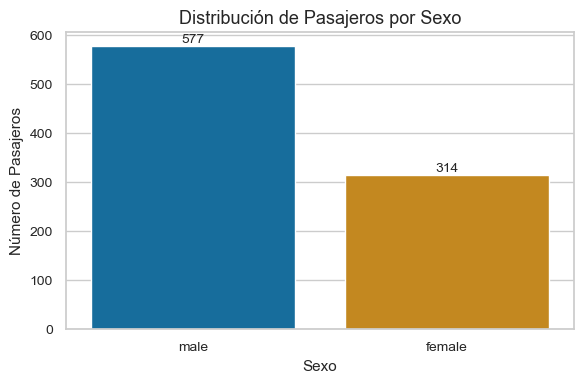

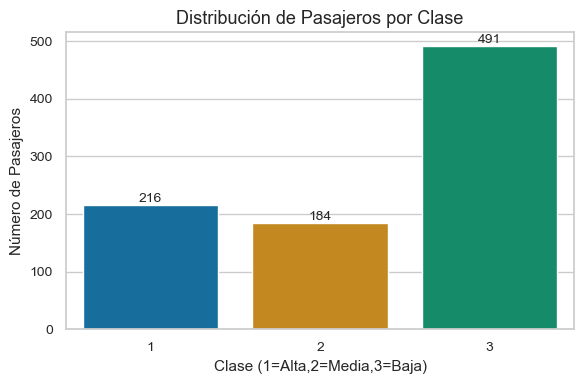

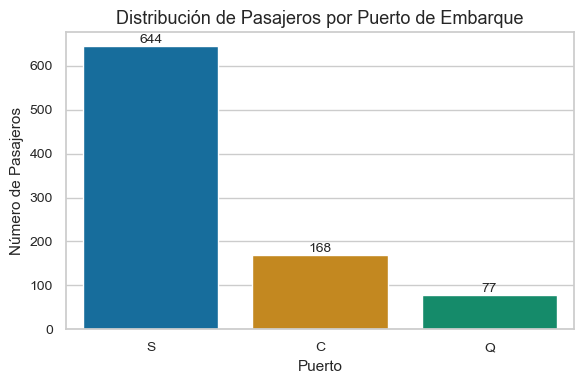

In [15]:
# Sexo
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Sex", palette=PALETTE)
plt.title("Distribución de Pasajeros por Sexo")
plt.xlabel("Sexo"); plt.ylabel("Número de Pasajeros")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.tight_layout()

# Clase
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Pclass", palette=PALETTE)
plt.title("Distribución de Pasajeros por Clase")
plt.xlabel("Clase (1=Alta,2=Media,3=Baja)"); plt.ylabel("Número de Pasajeros")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.tight_layout()


# Embarked
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="Embarked", palette=PALETTE)
plt.title("Distribución de Pasajeros por Puerto de Embarque")
plt.xlabel("Puerto"); plt.ylabel("Número de Pasajeros")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)
plt.tight_layout()

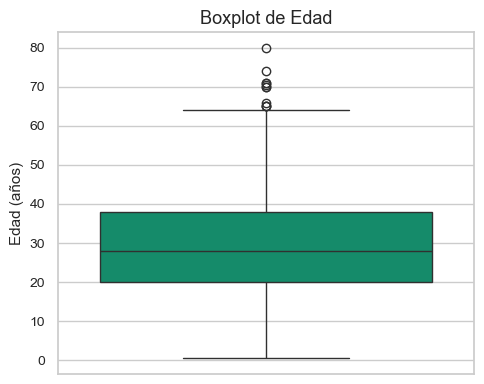

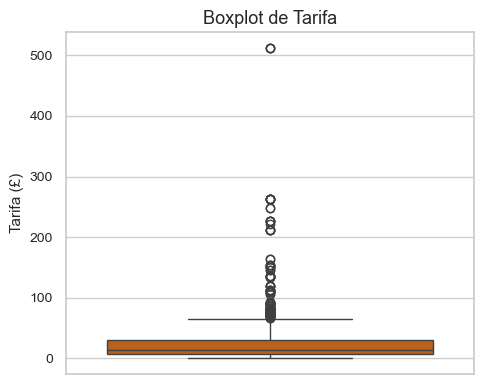

In [16]:
# Box Edad
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Age'], color=PALETTE[2])
plt.title("Boxplot de Edad")
plt.ylabel("Edad (años)")
plt.tight_layout(); plt.show()

# Box Tarifa
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Fare'], color=PALETTE[3])
plt.title("Boxplot de Tarifa")
plt.ylabel("Tarifa (£)")
plt.tight_layout(); plt.show()

## 1.4 Análisis Bivariado y Multivariado

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3595570284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Sex", y="Survived", palette=PALETTE, errorbar=None)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3595570284.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=df, x="Sex", y="Survived", palette=PALETTE, errorbar=None)


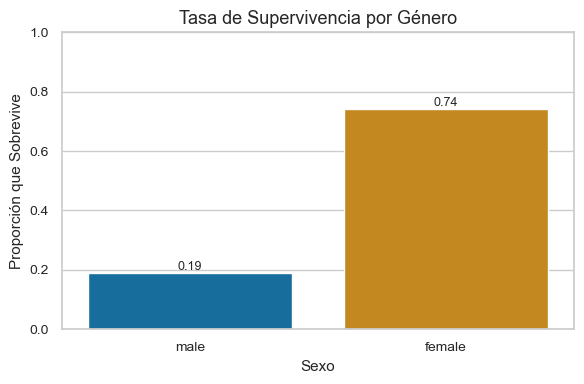

In [17]:
# Supervivencia por Género

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df, x="Sex", y="Survived", palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia por Género")
plt.xlabel("Sexo"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
plt.ylim(0,1); plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3239623390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Pclass", y="Survived", palette=PALETTE, errorbar=None)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3239623390.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=df, x="Pclass", y="Survived", palette=PALETTE, errorbar=None)


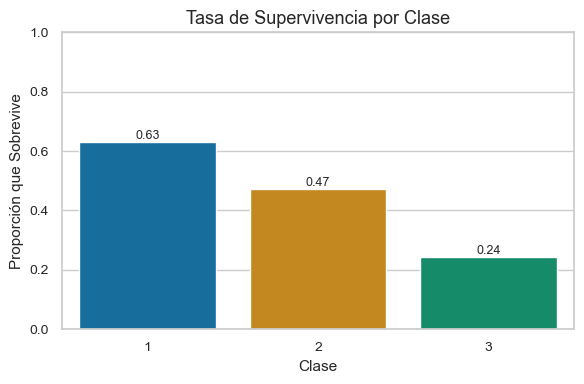

In [18]:
# Supervivencia por Clase

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df, x="Pclass", y="Survived", palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia por Clase")
plt.xlabel("Clase"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
plt.ylim(0,1); plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2220392174.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", palette=PALETTE, errorbar=None)


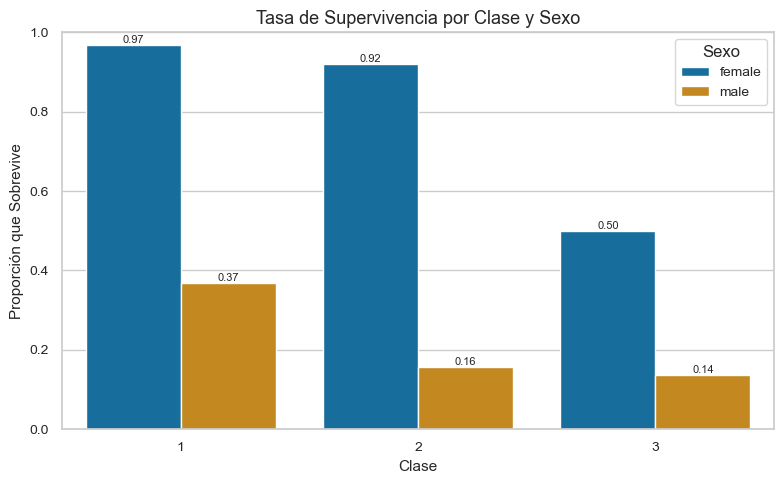

In [19]:
# Supervivencia por Género y Clase

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia por Clase y Sexo")
plt.xlabel("Clase"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=8)
plt.ylim(0,1); plt.legend(title="Sexo"); plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2124443162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="AgeGroup", y="Survived",
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2124443162.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.barplot(data=df, x="AgeGroup", y="Survived",


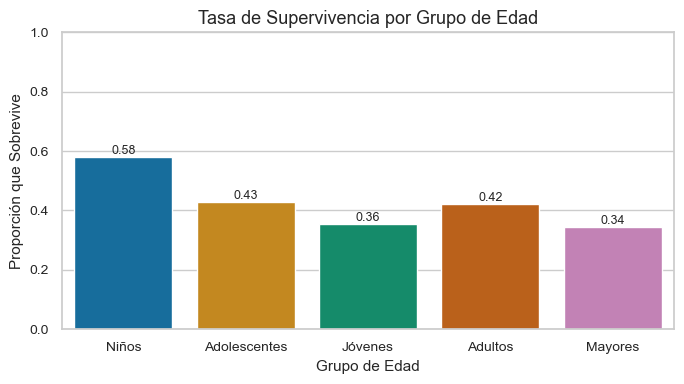

In [20]:
# Supervivencia por grupos de edad

plt.figure(figsize=(7,4))
ax = sns.barplot(data=df, x="AgeGroup", y="Survived",
                 order=["Niños","Adolescentes","Jóvenes","Adultos","Mayores"],
                 palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia por Grupo de Edad")
plt.xlabel("Grupo de Edad"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
plt.ylim(0,1); plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2299457450.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", col="AgeGroup",


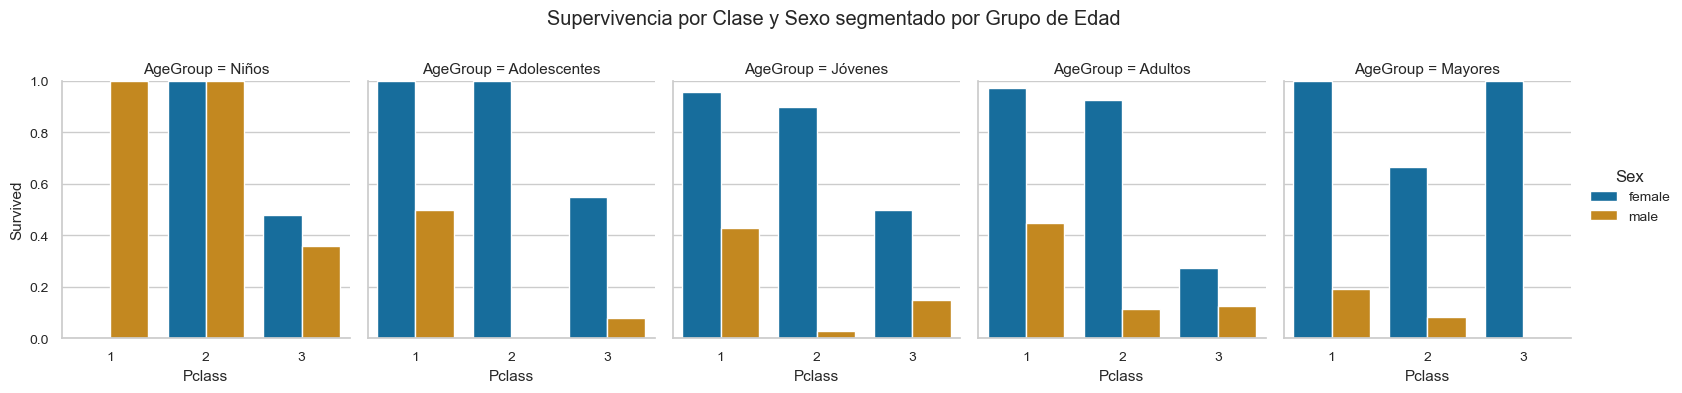

In [21]:
# Segmentado por Grupo de Edad

g = sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", col="AgeGroup",
                kind="bar", palette=PALETTE, errorbar=None, height=4, aspect=0.8)
g.figure.subplots_adjust(top=0.8)
g.figure.suptitle("Supervivencia por Clase y Sexo segmentado por Grupo de Edad")
g.set(ylim=(0,1))

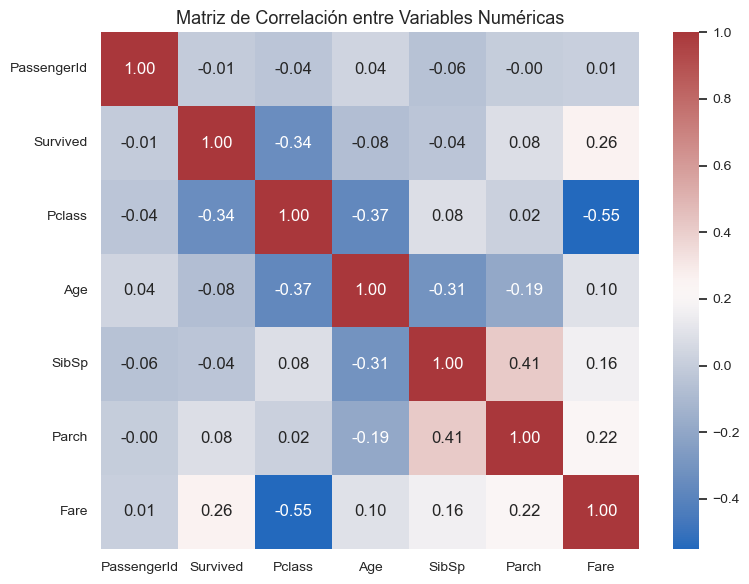

In [22]:
# Matriz de correlación

plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3641510193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Embarked", y="Survived", palette=PALETTE, errorbar=None)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3641510193.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(data=df, x="Embarked", y="Survived", palette=PALETTE, errorbar=None)


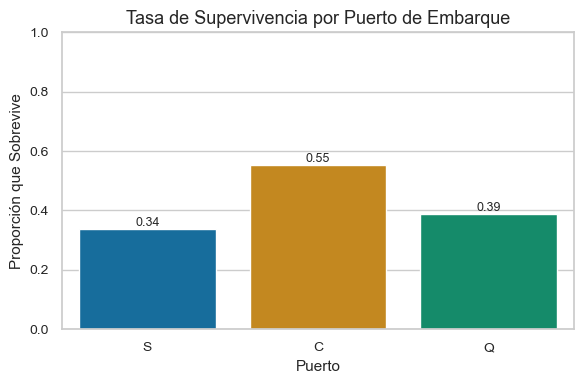

In [23]:
# Supervivencia por Puerto de Embarque

plt.figure(figsize=(6,4))
ax = sns.barplot(data=df, x="Embarked", y="Survived", palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia por Puerto de Embarque")
plt.xlabel("Puerto"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
plt.ylim(0,1); plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3680019705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x="Pclass", y="Fare", palette=PALETTE, cut=0, inner="box")
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\3680019705.py:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.violinplot(data=df, x="Pclass", y="Fare", palette=PALETTE, cut=0, inner="box")


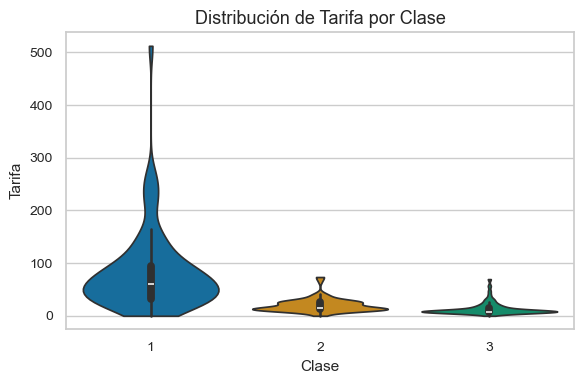

In [24]:
# Tarifa por clase

plt.figure(figsize=(6,4))
ax = sns.violinplot(data=df, x="Pclass", y="Fare", palette=PALETTE, cut=0, inner="box")
ax.set_yscale("linear")
plt.title("Distribución de Tarifa por Clase")
plt.xlabel("Clase"); plt.ylabel("Tarifa")
plt.tight_layout()

C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2204815583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="FamilySize", y="Survived", palette=PALETTE, errorbar=None)
C:\Users\luigu\AppData\Local\Temp\ipykernel_35560\2204815583.py:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.barplot(data=df, x="FamilySize", y="Survived", palette=PALETTE, errorbar=None)


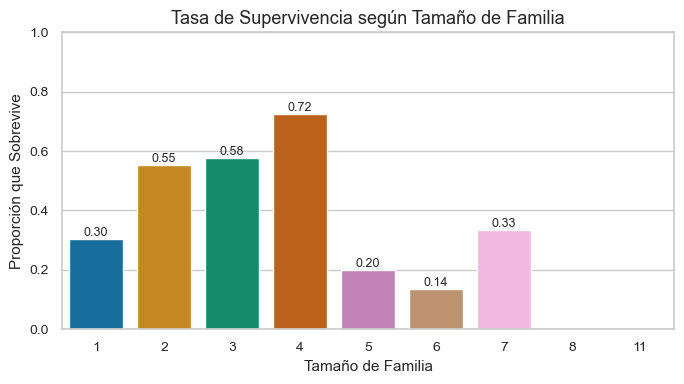

In [25]:
# Supervivencia por tamaño de familia

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(7,4))
ax = sns.barplot(data=df, x="FamilySize", y="Survived", palette=PALETTE, errorbar=None)
plt.title("Tasa de Supervivencia según Tamaño de Familia")
plt.xlabel("Tamaño de Familia"); plt.ylabel("Proporción que Sobrevive")
for p in ax.patches:
    v = p.get_height()
    if v > 0.01:
        ax.annotate(f"{v:.2f}", (p.get_x()+p.get_width()/2, v),
                    ha="center", va="bottom", fontsize=9)
plt.ylim(0,1); plt.tight_layout()

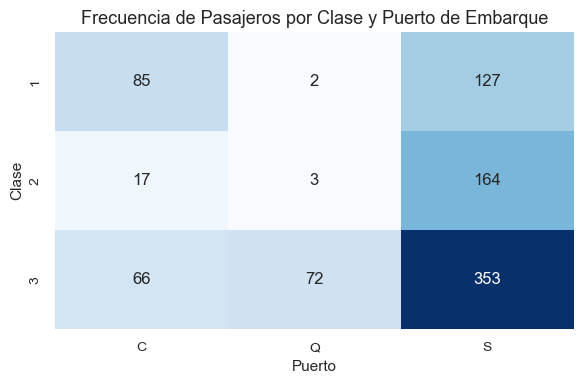

In [26]:
# Heatmap de relaciones categóricas 

plt.figure(figsize=(6,4))
tabla = pd.crosstab(df['Pclass'], df['Embarked'])
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Frecuencia de Pasajeros por Clase y Puerto de Embarque")
plt.xlabel("Puerto"); plt.ylabel("Clase")
plt.tight_layout()

In [27]:
# Interactivo

fig = px.scatter(
    df, x="Age", y="Fare", color=df["Survived"].astype(str),
    symbol=df["Sex"] if "Sex" in df.columns else None,
    hover_data=["Pclass","Embarked", "Title"],
    title="Edad vs Tarifa por Supervivencia"
)
fig.show()

## 1.5 Análisis de Valores Faltantes

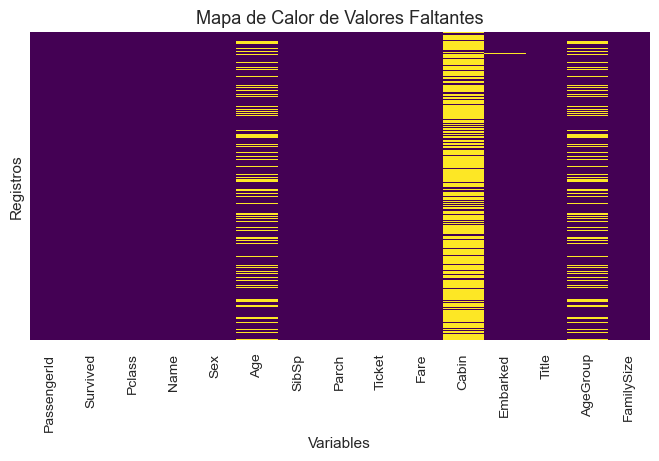

In [28]:
# Visualizar patrones de valores faltantes

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Mapa de Calor de Valores Faltantes")
plt.xlabel("Variables"); plt.ylabel("Registros")
plt.show()

In [29]:
# Analizar si los valores faltantes son aleatorios o sistemáticos

print("Proporción de valores faltantes en Age por Clase:")
display(df.groupby("Pclass")["Age"].apply(lambda x: x.isnull().mean()))

print("Proporción de valores faltantes en Age por Sexo:")
display(df.groupby("Sex")["Age"].apply(lambda x: x.isnull().mean()))

print("Proporción de valores faltantes en Cabin por Clase:")
display(df.groupby("Pclass")["Cabin"].apply(lambda x: x.isnull().mean()))

print("Proporción de valores faltantes en Cabin por Sexo:")
display(df.groupby("Sex")["Cabin"].apply(lambda x: x.isnull().mean()))

Proporción de valores faltantes en Age por Clase:


Pclass
1    0.138889
2    0.059783
3    0.276986
Name: Age, dtype: float64

Proporción de valores faltantes en Age por Sexo:


Sex
female    0.168790
male      0.214905
Name: Age, dtype: float64

Proporción de valores faltantes en Cabin por Clase:


Pclass
1    0.185185
2    0.913043
3    0.975560
Name: Cabin, dtype: float64

Proporción de valores faltantes en Cabin por Sexo:


Sex
female    0.691083
male      0.814558
Name: Cabin, dtype: float64

Comentarios sobre faltantes:

- Age: No parece ser aleatorio ya que se concentran los datos faltantes en la 3a Clase y sobre todo en hombres.
- Cabin: En la 2a y 3a clase parece que practicamente no se registraron cabinas en comparación con la 1a clase, lo cuál nos lleva a pensar que solo registraban a los de "clase alta".